# Boosting

Le boosting est une méthode d'apprentissage ensembliste séquentielle qui construit une séquence de modèles itératifs, où chaque modèle est entraîné pour corriger les erreurs du modèle précédent. Les modèles faibles sont combinés pour former un modèle fort qui donne des prédictions plus précises. %Mais, quelle information des modèles précédents prend-on en compte lors de l'ajustement du modèle actuel ? Et comment seront-ils agrégés ? 
Les algorithmes de boosting populaires incluent AdaBoost, Gradient Boosting, XGBoost et Lightgbm.
Dans la suite, nous exploiteront ces algorithmes.

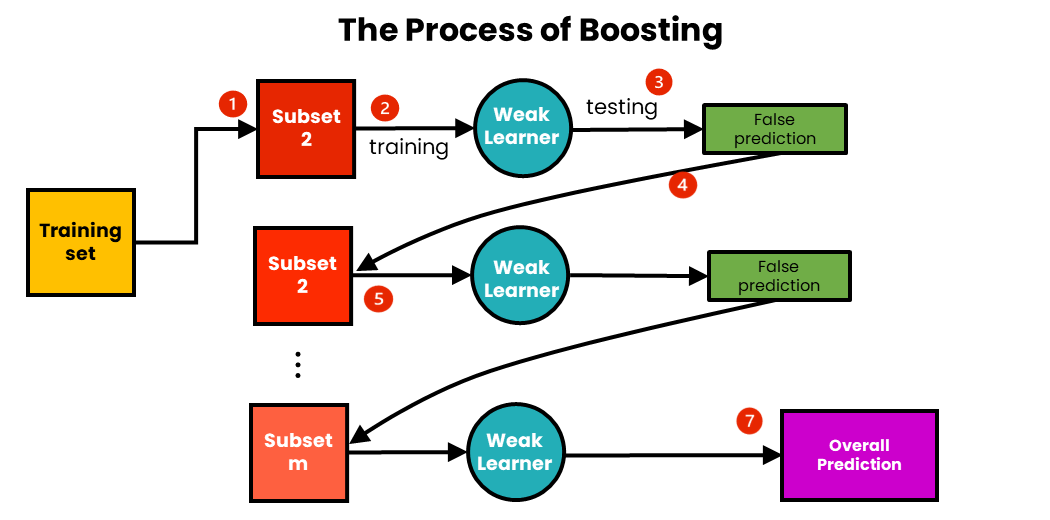

In [3]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/boosting.png"
width = 600
height = 600
Image(filename=image_path, width=width, height=height)

# Adaboost

AdaBoost, ou Adaptive Boosting, est l'un des algorithmes d'ensemble les plus puissants en apprentissage automatique. Les apprenants faibles sont des arbres de décisions qui ont une performance légèrement meilleure que le hasard.

Les apprenants faibles de Adaboost (Adaptive Boosting) sont des arbres de décisions. Chaque arbre dépend de celui qui le précède, ce qui contraste avec ce que nous avons vu pour les forêts aléatoires. De plus, chaque arbre dans AdaBoost est une "souche", ce qui signifie qu'il possède une racine et seulement deux feuilles. Un tel arbre est donc insuffisant en lui-même pour faire des prédictions, confirmant ainsi l'idée de complémentarité avec les arbres précédents.

On revient à l'échantillon des données qu'on a utilisé pour le calcul d'entropie. On expliquera brièvement les étapes de fonctionnement de Adaboost sur ces données. L'algorithme commence à ajouter une colonne poids aux données  $W_i = \frac{1}{\text{nombre total d'observations}}$. Ainsi au départ, toutes les observations sont importantes.


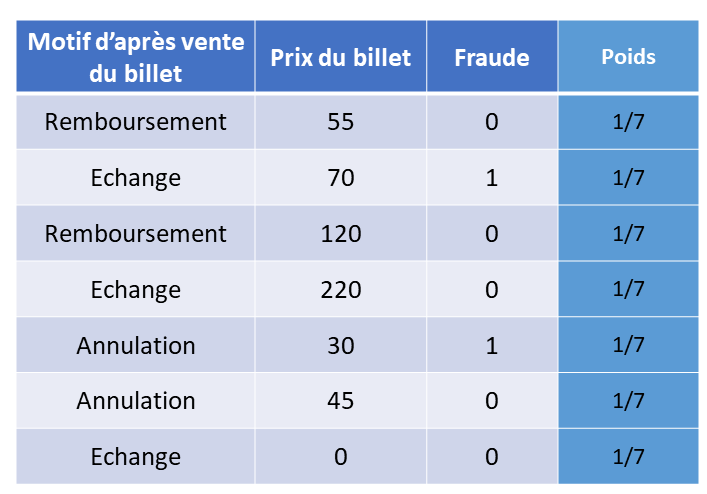

In [2]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/couleur1.png"
width = 400
height = 400
Image(filename=image_path, width=width, height=height)

Ensuite, le modèle crée le premier arbre de décision. Supposons qu'il ait mal classé les deux premières observations. Il faut calculer l'erreur totale de l'arbre : 
\[
E_{\text{totale}} = \text{Somme des poids des observations mal classées} = W_1 + W_2 = \frac{1}{7} + \frac{1}{7} = \frac{2}{7}
\]

Dans AdaBoost, chaque arbre ne contribue pas de manière égale à la décision finale. Pour ce faire, à partir de l'erreur calculée, on évalue la performance de chaque arbre, et cette évaluation est utilisée dans la prédiction finale. La performance est donnée par la formule suivante \cite{Ada} : \\

\begin{equation}
    \text{Performance} = \frac{1}{2} \cdot \log\left(\frac{1 - E_{\text{totale}}}{E_{\text{totale}}}\right) \approx 0.3466
\end{equation}

L'étape suivante consiste à mettre à jour les poids. Les poids des observations mal classées seront augmentés afin que l'arbre suivant puisse se concentrer principalement sur elles. En revanche, les poids des individus correctement classés par l'arbre précédent sont réduits, ce qui fait que le nouvel arbre leur accorde moins d'attention.

Soit $W_n$ le nouveau poids et $W_a$ l’ancien poids,\\
$\left\{
    \begin{array}{ll}
       W_n = W_a \times \exp(Performance) &  \text{si l'observation est mal classée} \\
         W_n = W_a \times \exp(-Performance) & \text{si l'observation est correctement classée}
    \end{array}
\right.
$
\\

Les poids sont normalisés afin que leur somme reste toujours égale à 1.\\
Ensuite, des niveaux sont calculés. Maintenant, ce que fait l'algorithme, c'est qu'il sélectionne n  (où n est le nombre total d'observations dans la base de données) nombres aléatoires de 0 à 1. Étant donné que les observations incorrectement classées ont des poids plus élevés, leur probabilité d'être sélectionnées est considérablement plus élevée.

Prenons l'exemple où l'algorithme génère 7 nombres aléatoires : 0.05, 0.15, 0.7, 0.55, 0.20, 0.3, 0.8. L'algorithme détermine les niveaux dans lesquelles ces nombres se situent, puis sélectionne les observations correspondantes pour créer un nouveau jeu de données.

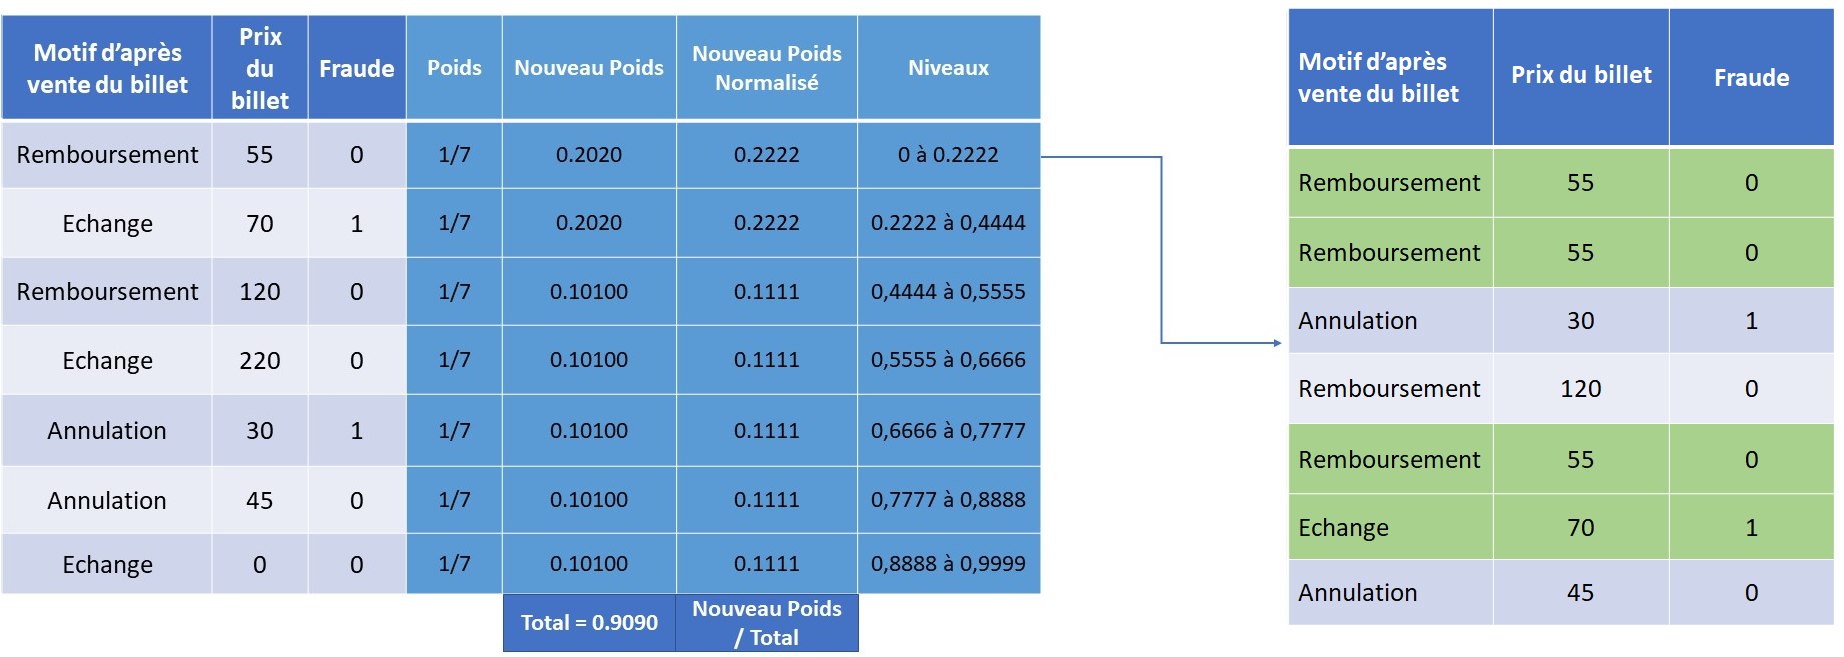

In [7]:
from IPython.display import Image
image_path = "/home/jovyan/github intro/1-2.png"
width = 900
height = 900
Image(filename=image_path, width=width, height=height)

La première observation a été sélectionnée 3 fois, car elle avait été mal classée lors de la première itération. Ainsi, les observations mal classées seront plus sélectionnées.

La deuxième itération suivra les mêmes étapes sur la nouvelle base de données contenant plusieurs fois les observations incorrectement classées. Les poids seront réinitialisés à une valeur égale pour tous les points de données, puis le processus de classification, de calcul de la performance et de la mise à jour des poids sera répété.\\
Pour prédire la classe d'une nouvelle observation, l'algorithme recueille les réponses de tous les arbres construits. Ensuite, il calcule la somme des performances pour les arbres ayant prédit la classe positive, ainsi que pour ceux ayant prédit la classe négative. La décision finale est prise en faveur du groupe dont la somme des performances est la plus élevée.\\

# Adaboost with Scikit-Learn

In [14]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
from sklearn.model_selection import train_test_split

df = sns.load_dataset('titanic')
df = pd.DataFrame(df)
df = df[["pclass", "sex", "age", "fare", "class", "survived"]]

df['age'] = df['age'].fillna(df['age'].median())

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OrdinalEncoder

#sex
lb = LabelBinarizer()
df["sex"] = lb.fit_transform(df["sex"])

#class
ordinal_encoder = OrdinalEncoder()
df[["class"]] = ordinal_encoder.fit_transform(df[["class"]])

X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

adaboost_classifier = AdaBoostClassifier(random_state=42)

In [20]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0],
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 150]},
             scoring='f1')

In [21]:
 grid_search.best_params_

{'learning_rate': 0.5, 'n_estimators': 150}